In [4]:
# Implementing LeNet CNN algorithm using PyTorch and storing the trained weights and biases for 5 epochs (HEX), in txt files.

import torch
import torchvision
import torchvision.transforms as T

In [2]:
# 1) Prepare the data

# Data preprocessing
# ETL task : Extract, Transform and Load the data

train_set = torchvision.datasets.MNIST( # train_set - dataset variable (it is an instance of FashionMNIST class that is inside torchvision package)
    # raw data EXTRACT
    root = './data',
    train = True,
    download = True,
    # raw image data TRANSFORM to tensor
    transform = T.Compose([T.ToTensor()])  
)


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


In [5]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)

In [6]:
import numpy as np

len(train_set)
torch.set_printoptions(linewidth=120)
train_set.data.shape

torch.Size([60000, 28, 28])

In [7]:
print(train_loader.batch_size)
train_loader.dataset

100


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [8]:
sample1 = next(iter(train_set)) # to access indiv elements from trainset object
len(sample1)

2

In [9]:
# to convert 28X28 image to 32X32 image for LeNet architecture
import numpy as np
sample      = np.pad(sample1[0], ((0,0),(2,2),(2,2)), 'constant')

image = sample
label = sample1[1]
image = torch.tensor(image)
label = torch.tensor(label)
print(image.shape, label)

torch.Size([1, 32, 32]) tensor(5)


In [10]:
import matplotlib.pyplot as plt

print(image.size())
print(image.squeeze().size())
print("label",label)
plt.imshow(image.squeeze(), cmap='gray') # squeeze is used to remove 1D enteries from the shape of an array

torch.Size([1, 32, 32])
torch.Size([32, 32])
label tensor(5)


In [11]:
batch = next(iter(train_loader)) # similar to sample above
images     = np.pad(batch[0], ((0,0),(0,0),(2,2),(2,2)), 'constant')
labels = batch[1]
images = torch.tensor(images)
labels = torch.tensor(labels)
images.shape # dimention (B X C X H X W)

C:\Users\jujare\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


torch.Size([100, 1, 32, 32])

torch.Size([3, 342, 342])
labels tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6,
        0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6,
        3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1])


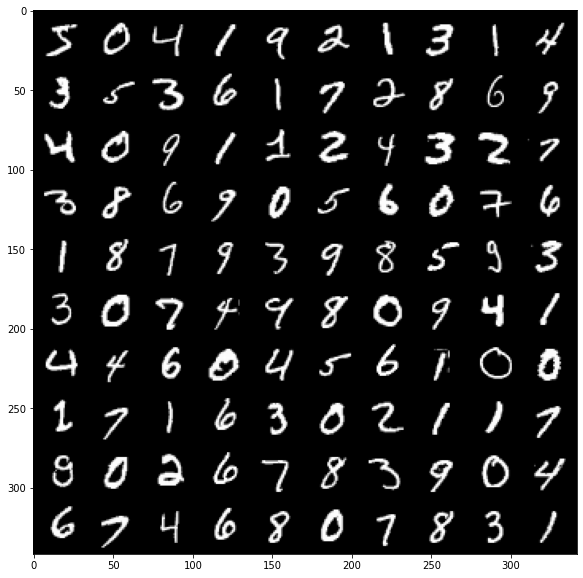

In [12]:
# print images in a batch

grid = torchvision.utils.make_grid(images, nrow=10) # creating a grid
plt.figure(figsize=(10,10))
print(grid.shape)
print("labels", labels)
plt.imshow(np.transpose(grid, (1,2,0)))

In [13]:
# 2) Build the model

import torch.nn as nn
import torch.nn.functional as F

In [14]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
 
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) # in_channel, out_channel etc -> parameters (place holder); 1,6 etc -> arguments (values)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5) # kernel --> filter
    self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)

    self.fc1 = nn.Linear(in_features=120*1*1, out_features=84) 
    self.out = nn.Linear(in_features=84, out_features=10) # out_features depend on the no.of classes/classification present in the training set ie 10 (trouser, pullover etc)
  
  def forward(self, t): # fowrard propagation
    # input layer
    t = t # not required, since implicit in pytorch. this layer converts tensor t to identity matrix. => tensor dim : [1,1,32,32]
    # hidden conv 1 layer
    t = self.conv1(t) # => dim : [1,6,28,28]
    t = F.relu(t) 
    t = F.max_pool2d(t, kernel_size=2, stride=2) # => dim : [1,6,14,14]
    # hidden conv 2 layer
    t = self.conv2(t) # => dim : [1,16,10,10]
    t = F.relu(t)
    t = F.max_pool2d(t, kernel_size=2, stride=2) # => dim : [1,16,5,5]
    # hidden conv 3 layer
    t = self.conv3(t) # => dim : [1,120,1,1]
    t = F.relu(t)
    # hidden dense/full layer 1
    t = t.reshape(-1, 120*1*1) # => dim : [1,120]
    t = self.fc1(t)
    t = F.relu(t)
    # output
    t = self.out(t)

    return t

In [15]:
network = LeNet()
preds = network(images)
#preds = F.softmax(preds) # in case if propabilities are required instead of values
preds.shape # batch size X output feature classes indexes
#print(preds)
print(labels)
preds.argmax(dim=1) # for each of th images in batch, we are finding the prediction class index that has the higheest value

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6,
        0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6,
        3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1])


tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [16]:
# function to get tot no of correct predictions
def get_num_correct_preds(preds, labels):
  # preds.argmax(dim=1).eq(labels) # labels of correct predictions
  return preds.argmax(dim=1).eq(labels).sum().item() # total no of correct predictions

In [17]:
get_num_correct_preds(preds, labels)

11

In [18]:
DQN = LeNet()
print(DQN)

import copy
# storing initial weights
init_conv1_weights = copy.deepcopy(DQN.conv1.weight.data)
init_conv2_weights = copy.deepcopy(DQN.conv2.weight.data)
init_conv3_weights = copy.deepcopy(DQN.conv3.weight.data)
init_fc1_weights = copy.deepcopy(DQN.fc1.weight.data)
init_out_weights = copy.deepcopy(DQN.out.weight.data)

print(init_conv1_weights, init_conv2_weights.shape, init_conv3_weights.shape, init_fc1_weights.shape, init_out_weights)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (out): Linear(in_features=84, out_features=10, bias=True)
)
tensor([[[[ 0.1233,  0.0022,  0.1036,  0.0447, -0.0902],
          [-0.1513, -0.0739,  0.0773,  0.0651,  0.0490],
          [ 0.0069, -0.1575,  0.1215, -0.0532, -0.1078],
          [ 0.0411, -0.0338, -0.1449,  0.0771, -0.1781],
          [-0.1837, -0.0025,  0.1781,  0.1693,  0.1184]]],


        [[[ 0.0208, -0.1981, -0.1190, -0.0283,  0.0028],
          [ 0.0854,  0.0047, -0.0685, -0.0959,  0.1652],
          [-0.0247,  0.1105, -0.0518,  0.1113,  0.0641],
          [-0.1036,  0.0503, -0.0991,  0.0507,  0.1871],
          [-0.1906,  0.0957,  0.1701, -0.0210, -0.0533]]],


        [[[ 0.0945, -0.0502, -0.1849,  0.0996, -0.1584],
          [ 0.0837,  0.1106, -0.0229, -0.0686,  0.0809

          2.2016e-02, -3.9588e-02, -1.3237e-03,  8.2062e-02]])


In [19]:
import torch.optim as optim
#3. Batch Training

#train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=100, shuffle=False)
optimiser = optim.Adagrad(DQN.parameters(), lr=0.01)

for epoch in range(6):
  total_loss = 0
  total_correct = 0
  for batch in train_loader:
    #images, labels = batch
    images = np.pad(batch[0], ((0,0),(0,0),(2,2),(2,2)), 'constant')
    labels = batch[1]
    images = torch.tensor(images, dtype=torch.float32, requires_grad=True)
    labels = torch.tensor(labels)
    preds = DQN(images)
    loss = F.cross_entropy(preds, labels)
    #optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    total_loss += loss.item()
    total_correct += get_num_correct_preds(preds, labels)
  print ("epoch : " + str(epoch+1) +"\t"+ "total_entropy_loss : " + str(total_loss) +"\t\t"+ "total_correct_predictions : " + str(total_correct))

C:\Users\jujare\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app


epoch : 1	total_entropy_loss : 168.07038126513362		total_correct_predictions : 55106
epoch : 2	total_entropy_loss : 89.3695911266841		total_correct_predictions : 57603
epoch : 3	total_entropy_loss : 85.03275875898544		total_correct_predictions : 57898
epoch : 4	total_entropy_loss : 70.36776630906388		total_correct_predictions : 58199
epoch : 5	total_entropy_loss : 74.33369036880322		total_correct_predictions : 58225
epoch : 6	total_entropy_loss : 81.42262309571379		total_correct_predictions : 58073


In [20]:
# storing trained weights
trained_conv1_weights = copy.deepcopy(DQN.conv1.weight.data)
trained_conv2_weights = copy.deepcopy(DQN.conv2.weight.data)
trained_conv3_weights = copy.deepcopy(DQN.conv3.weight.data)
trained_fc1_weights = copy.deepcopy(DQN.fc1.weight.data)
trained_out_weights = copy.deepcopy(DQN.out.weight.data)
print(trained_conv1_weights.shape, trained_conv2_weights.shape, trained_conv3_weights.shape, trained_fc1_weights.shape, trained_out_weights.shape)

torch.Size([6, 1, 5, 5]) torch.Size([16, 6, 5, 5]) torch.Size([120, 16, 5, 5]) torch.Size([84, 120]) torch.Size([10, 84])


In [21]:
import struct

print(trained_conv1_weights.shape, trained_conv2_weights.shape, trained_conv3_weights.shape, trained_fc1_weights.shape, trained_out_weights.shape)

def float32_to_hex(f):
    return hex(struct.unpack('<I', struct.pack('<f', f))[0])

trained_conv1_weights1 = torch.flatten(trained_conv1_weights)
trained_conv2_weights1 = torch.flatten(trained_conv2_weights)
trained_conv3_weights1 = torch.flatten(trained_conv3_weights)
trained_fc1_weights1 = torch.flatten(trained_fc1_weights)
trained_out_weights1 = torch.flatten(trained_out_weights)

#print(float32_to_hex(trained_conv1_weights2.min())) 
#print(trained_conv1_weights2.dtype, trained_conv1_weights2.min(), trained_conv1_weights2.argmin())

#print(float32_to_hex(trained_conv1_weights2.max())) 
#print(trained_conv1_weights2.dtype, trained_conv1_weights2.max(), trained_conv1_weights2.argmax())

trained_conv1_weights_hex = []
for i in range(len(trained_conv1_weights1)):
    #trained_conv1_weights_hex.append(float32_to_hex(int(torch.round(trained_conv1_weights1[i]))))
    trained_conv1_weights_hex.append(float32_to_hex(trained_conv1_weights1[i]))
    
trained_conv2_weights_hex = []
for i in range(len(trained_conv2_weights1)):
    trained_conv2_weights_hex.append(float32_to_hex(trained_conv2_weights1[i]))
    
trained_conv3_weights_hex = []
for i in range(len(trained_conv3_weights1)):
    trained_conv3_weights_hex.append(float32_to_hex(trained_conv3_weights1[i]))
    
trained_fc1_weights_hex = []
for i in range(len(trained_fc1_weights1)):
    trained_fc1_weights_hex.append(float32_to_hex(trained_fc1_weights1[i]))
    
trained_out_weights_hex = []
for i in range(len(trained_out_weights1)):
    trained_out_weights_hex.append(float32_to_hex(trained_out_weights1[i]))
    
print(len(trained_conv1_weights_hex), len(trained_conv2_weights_hex), len(trained_conv3_weights_hex), len(trained_fc1_weights_hex), len(trained_out_weights_hex))

torch.Size([6, 1, 5, 5]) torch.Size([16, 6, 5, 5]) torch.Size([120, 16, 5, 5]) torch.Size([84, 120]) torch.Size([10, 84])
150 2400 48000 10080 840


In [24]:
fp = open(r'C:\Users\jujare\Desktop\kushal\Peashon\HWaccel\WeightMatrices\LeNet_weights_hex.txt', 'w')

#############################
fp.write("********** conv1 **********\n")
fp.write(str(trained_conv1_weights_hex))
fp.write("\n")
fp.write("********** conv2 **********\n")
fp.write(str(trained_conv2_weights_hex))
fp.write("\n")
fp.write("********** conv3 **********\n")
fp.write(str(trained_conv3_weights_hex))
fp.write("\n")
fp.write("********** fc1 **********\n")
fp.write(str(trained_fc1_weights_hex))
fp.write("\n")
fp.write("********** out **********\n")
fp.write(str(trained_out_weights_hex))
fp.write("\n")
fp.close()

In [25]:
fp = open(r'C:\Users\jujare\Desktop\kushal\Peashon\HWaccel\WeightMatrices\LeNet_weights_orig.txt', 'w')

#############################
fp.write("********** conv1 **********\n")
fp.write(str(trained_conv1_weights))
fp.write("\n")
fp.write("********** conv2 **********\n")
fp.write(str(trained_conv2_weights))
fp.write("\n")
fp.write("********** conv3 **********\n")
fp.write(str(trained_conv3_weights))
fp.write("\n")
fp.write("********** fc1 **********\n")
fp.write(str(trained_fc1_weights))
fp.write("\n")
fp.write("********** out **********\n")
fp.write(str(trained_out_weights))
fp.write("\n")
fp.close()